In [21]:
import pandas as pd

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [23]:
df= pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')

In [24]:
df.index= df.time

In [25]:
df.index = pd.to_datetime(df.index)

In [26]:
df = df.drop(columns=['time', 'Unnamed: 0'], axis=1)

In [27]:
df.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-next-hour', 'electric-combined-yesterday',
       'electric-combined-last-week'],
      dtype='object')

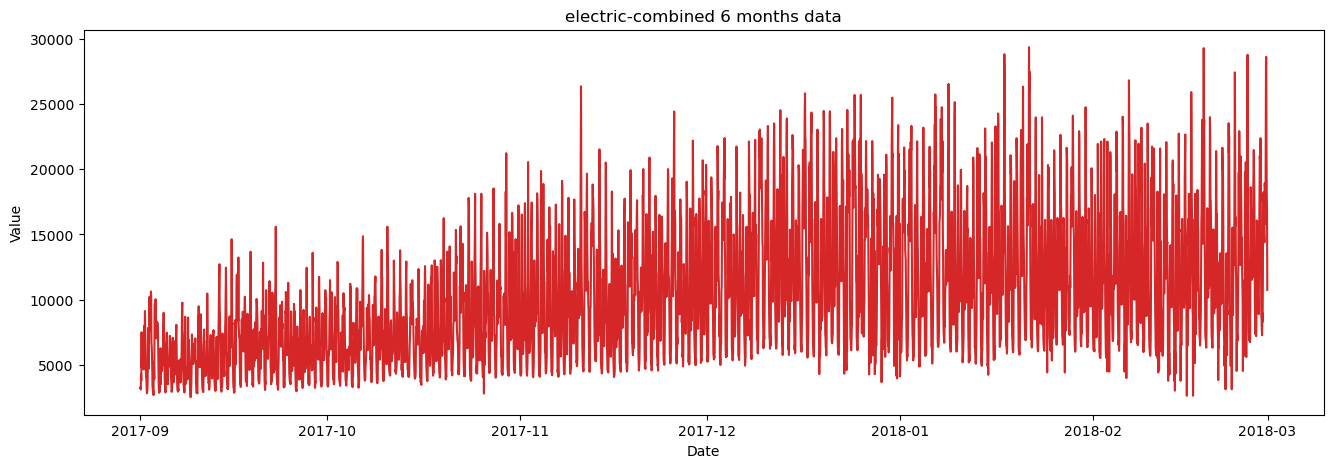

In [28]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['electric-combined'], title='electric-combined 6 months data')    

In [29]:
df.index.values

array(['2017-09-01T00:00:00.000000000', '2017-09-01T01:00:00.000000000',
       '2017-09-01T02:00:00.000000000', ...,
       '2018-02-28T21:00:00.000000000', '2018-02-28T22:00:00.000000000',
       '2018-02-28T23:00:00.000000000'], dtype='datetime64[ns]')

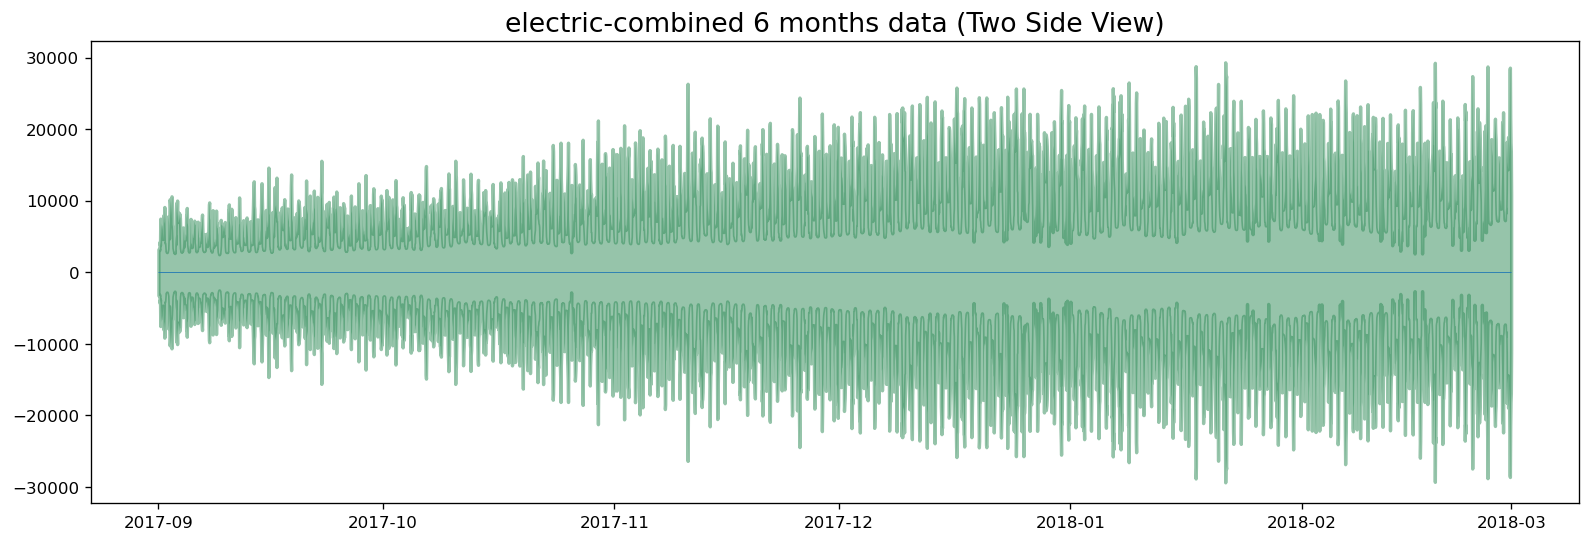

In [30]:
def two_sided_graph_to_show_growth(df):
    # Import data
    x = df.index.values
    y1 = df['electric-combined'].values

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
    #plt.ylim(-800, 800)
    plt.title('electric-combined 6 months data (Two Side View)', fontsize=16)
    plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
    plt.show()

two_sided_graph_to_show_growth(df)

#checking for seasonality

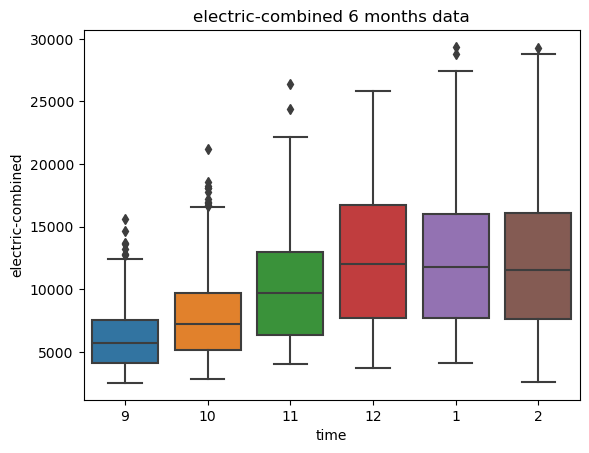

In [36]:
def box_plot(df):
    sns.boxplot(x=df.index.month, y=df['electric-combined'], order = [9,10,11,12,1,2])
    plt.title('electric-combined 6 months data')
    plt.show()

box_plot(df)

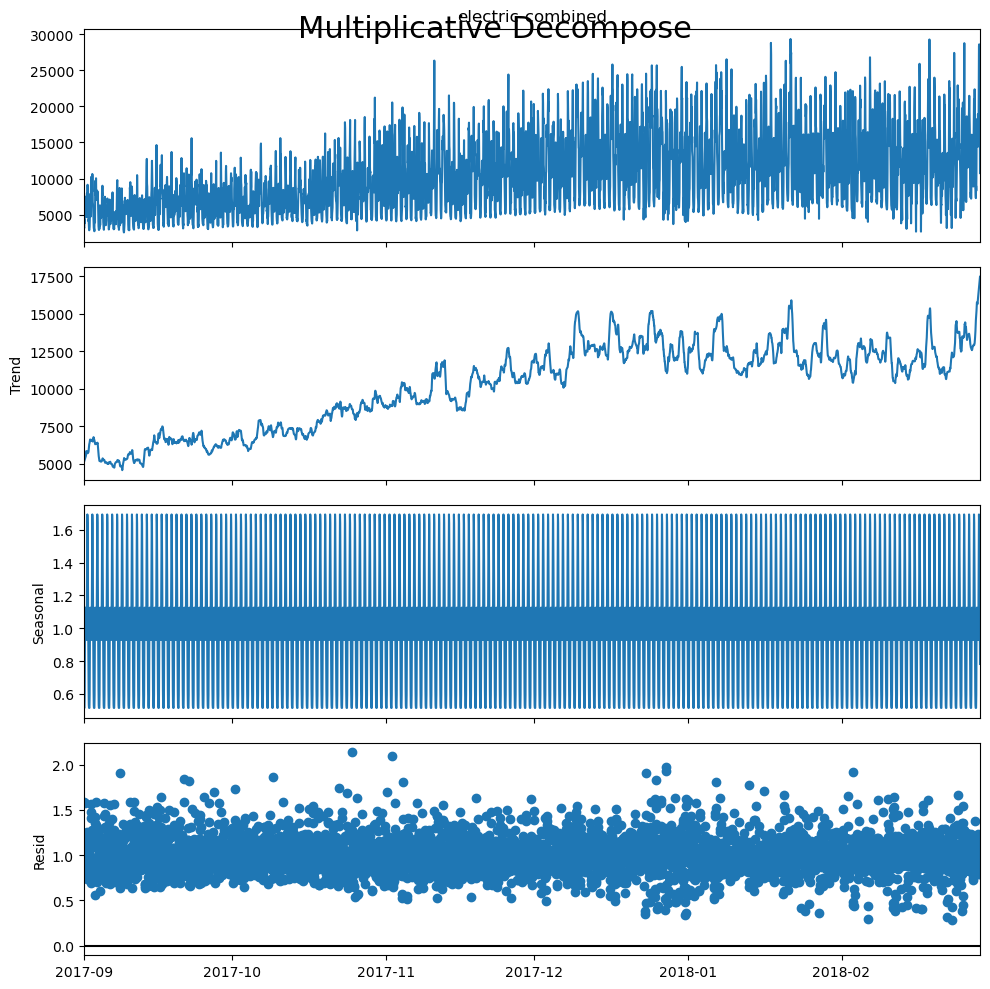

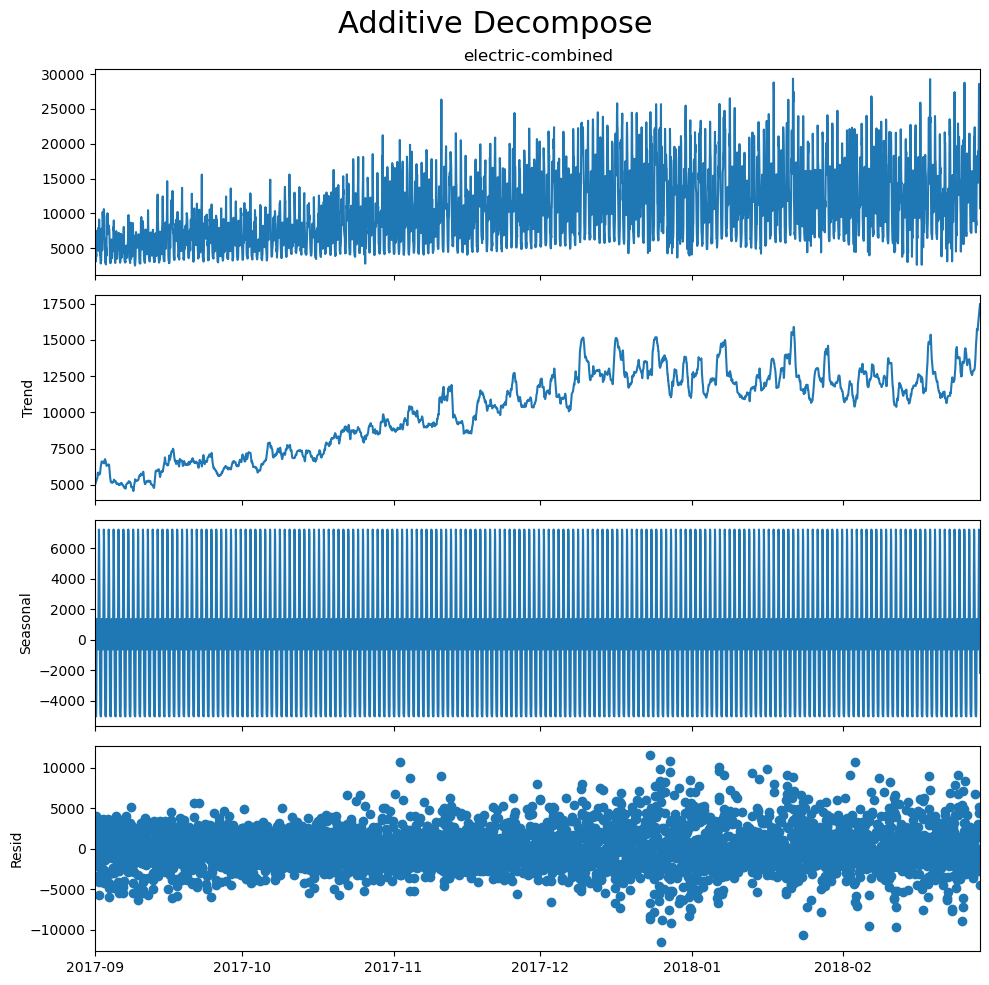

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['electric-combined'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['electric-combined'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.tight_layout()
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['electric-combined'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df['electric-combined'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.5198411441016697
p-value: 0.1107210907397978
Critial Values:
   1%, -3.4318656804750103
Critial Values:
   5%, -2.862209743553894
Critial Values:
   10%, -2.567126509308164

KPSS Statistic: 11.466528
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_37538/2229884151.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['electric-combined'].values, regression='c')


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

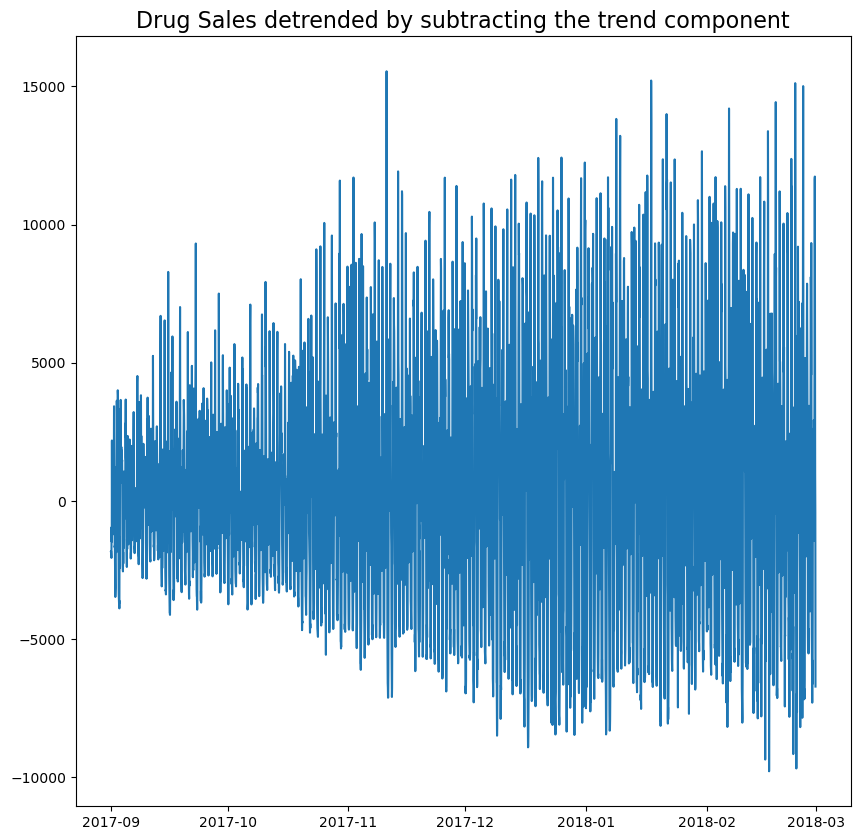

In [44]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['electric-combined'], model='multiplicative', extrapolate_trend='freq')
detrended = df['electric-combined'].values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)